In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
iris = pd.read_csv("iris dataset.csv")
iris.head(100)

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [3]:
iris.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
class           0
dtype: int64

In [4]:
iris.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'class'], dtype='object')

<AxesSubplot: >

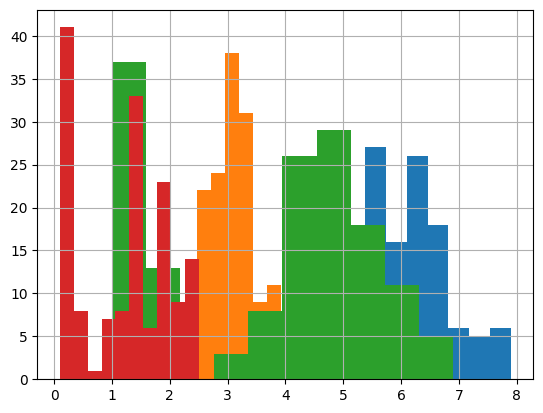

In [5]:
iris['Sepal Length'].hist()
iris['Sepal Width'].hist()
iris['Petal Length'].hist()
iris['Petal Width'].hist()

In [6]:
color = ['red','orange','blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


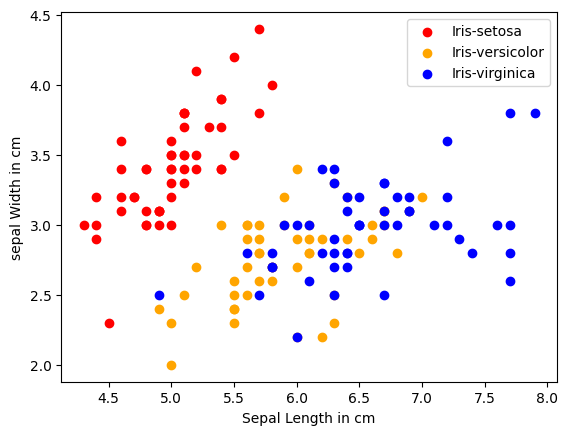

In [7]:
for i in range(3):
    x = iris[iris["class"] == species[i]]
    plt.scatter(x['Sepal Length'],x['Sepal Width'],c = color[i], label=species[i])
plt.xlabel("Sepal Length in cm")
plt.ylabel("sepal Width in cm")
plt.legend()
  

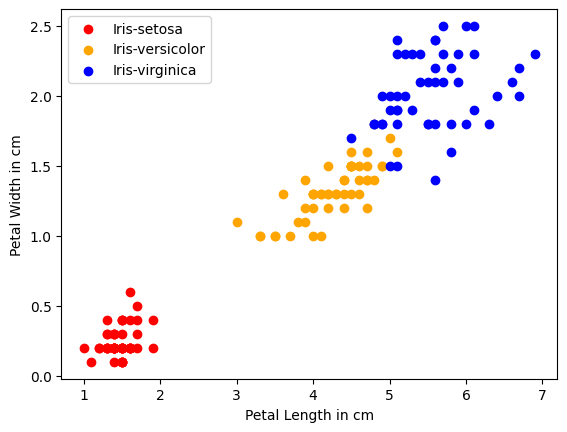

In [8]:
for i in range(3):
    x = iris[iris["class"] == species[i]]
    plt.scatter(x['Petal Length'],x['Petal Width'],c = color[i], label=species[i])
plt.xlabel("Petal Length in cm")
plt.ylabel("Petal Width in cm")
plt.legend()
  

In [9]:
iris.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot: >

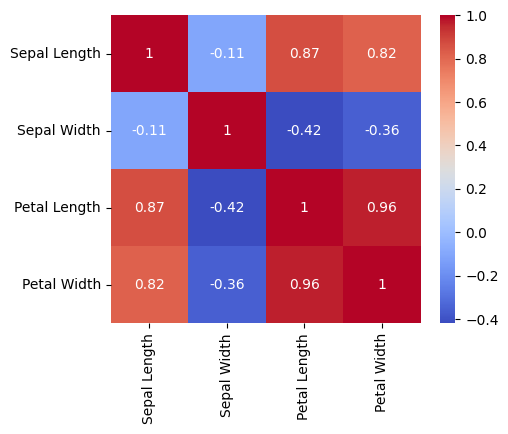

In [10]:
corr = iris.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
iris["class"] = le.fit_transform(iris["class"])
iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
x = iris.drop(["class"], axis=True)
y = iris["class"]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

x_lda_train = lda.fit_transform(x_train, y_train)
x_lda_test = lda.transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_lda_train, y_train)

LogisticRegression()

In [17]:
y_pred = reg.predict(x_lda_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 13]], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [24]:
#KFold
from sklearn.model_selection import KFold
kfold_validation = KFold(n_splits=5)

#cross_val_score
from sklearn.model_selection import cross_val_score

#mean_squared_error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error

In [25]:
reg_cross = cross_val_score(reg,x,y,cv=kfold_validation)

C:\Users\BENSON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
reg_cross

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [27]:
print('mse',mean_squared_error(y_test, y_pred))

mse 0.03333333333333333
